In [100]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from xgboost import XGBClassifier

In [102]:
# Load Dataset
dataset_path = "dataset.csv"
if os.path.exists(dataset_path):
    df = pd.read_csv(dataset_path)
else:
    raise FileNotFoundError("Dataset not found!")

In [104]:
dataframe = pd.read_csv('dataset.csv')  # Reading our dataset using read_csv function
dataframe.head()  # Printing the first 5 columns of our dataset using head function
dataframe.isnull().sum()  # Checking for missing values
dataframe.describe()  # Statistical summary of the dataset
dataframe.info()  # General info about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3646 entries, 0 to 3645
Data columns (total 17 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       3646 non-null   int64  
 1   male             3646 non-null   float64
 2   age              3646 non-null   float64
 3   education        3646 non-null   float64
 4   currentSmoker    3646 non-null   float64
 5   cigsPerDay       3646 non-null   float64
 6   BPMeds           3646 non-null   float64
 7   prevalentStroke  3646 non-null   float64
 8   prevalentHyp     3646 non-null   float64
 9   diabetes         3646 non-null   float64
 10  totChol          3646 non-null   float64
 11  sysBP            3646 non-null   float64
 12  diaBP            3646 non-null   float64
 13  BMI              3646 non-null   float64
 14  heartRate        3646 non-null   float64
 15  glucose          3646 non-null   float64
 16  TenYearCHD       3646 non-null   float64
dtypes: float64(16)

In [106]:
# Drop unnecessary columns if they exist
df.drop(columns=[col for col in ['education'] if col in df.columns], inplace=True)

In [108]:
# Rename target column
df.rename(columns={"TenYearCHD": "CHD"}, inplace=True)

In [110]:
# Handle missing values
imputer = SimpleImputer(strategy='most_frequent')
df.iloc[:, :] = imputer.fit_transform(df)

In [112]:
# Outlier removal using IQR
def remove_outliers(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    return df[(df[col] >= (Q1 - 1.5 * IQR)) & (df[col] <= (Q3 + 1.5 * IQR))]

In [114]:
for col in ['sysBP', 'BMI', 'heartRate', 'glucose', 'totChol']:
    df = remove_outliers(df, col)

In [116]:
# Splitting dataset into features and target
X = df.drop(columns=['CHD'])
y = df['CHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [118]:
# Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [120]:
# Model Training & Comparison
models = {
    "Logistic Regression": LogisticRegression(),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(kernel='rbf', probability=True),
    "XGBoost": xgb.XGBClassifier(eval_metric='logloss')  # Added XGBoost model
}

In [122]:
best_model = None
best_accuracy = 0

In [124]:
# Training and evaluating models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test, y_pred)
    print(f"{name} Accuracy: {acc:.4f}")
    if acc > best_accuracy:
        best_accuracy = acc
        best_model = model

Logistic Regression Accuracy: 0.8508
Random Forest Accuracy: 0.8492
SVM Accuracy: 0.8524
XGBoost Accuracy: 0.8413


In [126]:
# Best model evaluation
y_pred = best_model.predict(X_test)

print("\nBest Model Performance:")
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred, zero_division=1))


Best Model Performance:
[[537   0]
 [ 93   0]]
              precision    recall  f1-score   support

         0.0       0.85      1.00      0.92       537
         1.0       1.00      0.00      0.00        93

    accuracy                           0.85       630
   macro avg       0.93      0.50      0.46       630
weighted avg       0.87      0.85      0.78       630



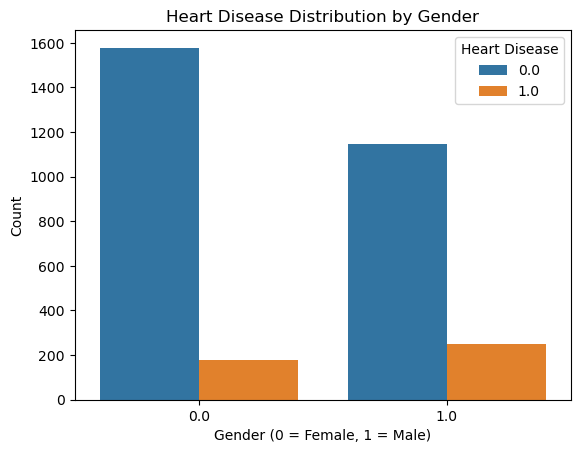

In [128]:
# Visualization (Added from dataset analysis)
sns.countplot(x=df['male'], hue=df['CHD'])
plt.title("Heart Disease Distribution by Gender")
plt.xlabel("Gender (0 = Female, 1 = Male)")
plt.ylabel("Count")
plt.legend(title="Heart Disease", loc='upper right')
plt.show()

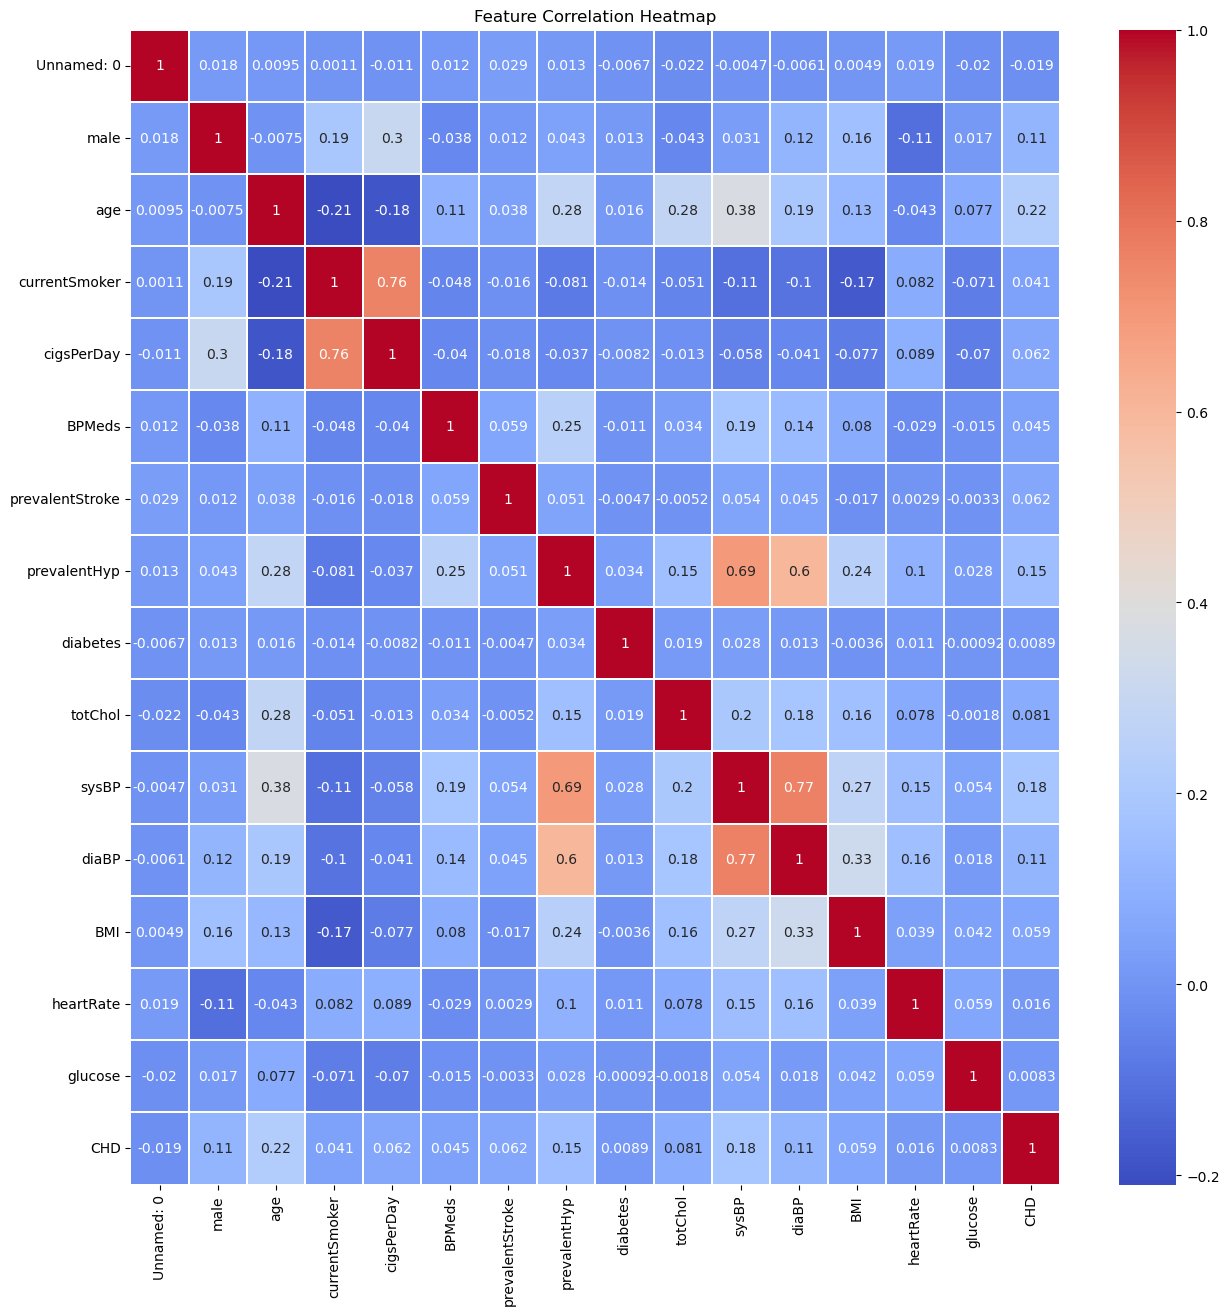

In [32]:
plt.figure(figsize=(15, 15))
sns.heatmap(df.corr(), annot=True, linewidths=0.1, cmap='coolwarm')
plt.title("Feature Correlation Heatmap")
plt.show()